In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv("price_elasticity.txt")
df.head()


,date,product_id,category,price,demand
0,2023-01-01,P101,Electronics,1000,120
1,2023-01-02,P101,Electronics,950,135
2,2023-01-03,P101,Electronics,900,160
3,2023-01-04,P101,Electronics,850,190
4,2023-01-05,P101,Electronics,800,230


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        15 non-null     object
 1   product_id  15 non-null     object
 2   category    15 non-null     object
 3   price       15 non-null     int64 
 4   demand      15 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 732.0+ bytes


,price,demand
count,15.000000,15.000000
mean,658.866667,271.333333
std,458.008245,183.190637
min,44.000000,90.000000
25%,49.000000,132.500000
50%,900.000000,180.000000
75%,975.000000,505.000000
max,1200.000000,530.000000


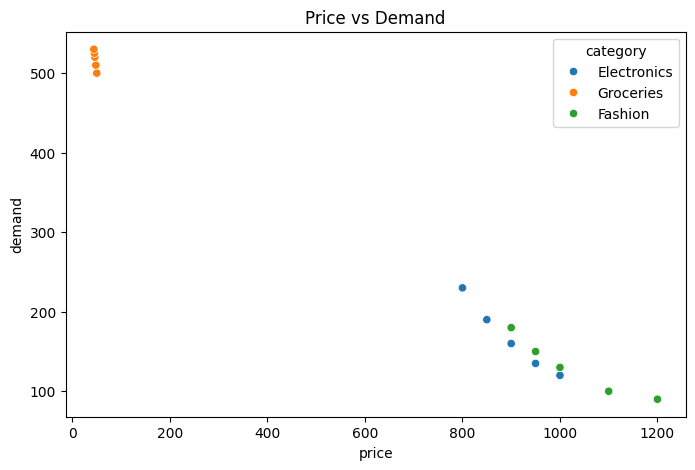

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="price", y="demand", hue="category")
plt.title("Price vs Demand")
plt.show()


In [7]:
df["log_price"] = np.log(df["price"])
df["log_demand"] = np.log(df["demand"])


In [8]:
X = df[["log_price"]]
y = df["log_demand"]

model = LinearRegression()
model.fit(X, y)

elasticity = model.coef_[0]
elasticity


np.float64(-0.43298131662897926)

In [9]:
print("Price Elasticity:", elasticity)

if elasticity < -1:
    print("Elastic Demand")
elif -1 <= elasticity < 0:
    print("Inelastic Demand")
else:
    print("Abnormal Demand")


Price Elasticity: -0.43298131662897926
Inelastic Demand


In [10]:
elasticity_by_category = {}

for cat in df["category"].unique():
    temp = df[df["category"] == cat]

    X = np.log(temp["price"]).values.reshape(-1,1)
    y = np.log(temp["demand"])

    model = LinearRegression()
    model.fit(X, y)

    elasticity_by_category[cat] = model.coef_[0]

elasticity_by_category


{'Electronics': np.float64(-2.9510205300693086),
 'Groceries': np.float64(-0.4561728324811279),
 'Fashion': np.float64(-2.442462209574792)}

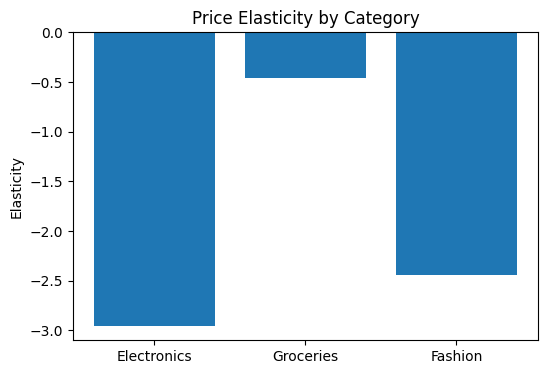

In [11]:
plt.figure(figsize=(6,4))
plt.bar(elasticity_by_category.keys(), elasticity_by_category.values())
plt.title("Price Elasticity by Category")
plt.ylabel("Elasticity")
plt.show()
